In [240]:
import pandas as pd  # обробка даних за допомогою бібліотеки pandas
import numpy as np
from matplotlib import pyplot as plt # візуалізация даних 
import calendar

import warnings
warnings.filterwarnings("ignore")

In [241]:
# В архіві знаходилось 12 файлів. Проходячи валідацію можна побачити, що в деяких випадках є "сміття" у строках. 

# 1. Зайві пусті строки. Їх можна позбутися за допомогою dropna(how='all')
# 2. Зайві строки у яких кортеж повністю співпадає з стовпчиками. Щоб їх позбутися замість назв поставимо за допомогою 
# replace NaN значеня та використовуваємо dropna(how='all')

# Validation part

def modified_kaggle_datasets_and_merge(file_prefix, count_files):
    modified_sales = []  # Кінцевий набор датафреймів

    for i in range(1, count_files + 1):
        filename = f"{file_prefix}{i}.csv"
        Sales = pd.read_csv(filename).replace(
        ['Order ID','Product','Quantity Ordered','Price Each','Order Date','Purchase Address'], 
        np.nan
        ).dropna(how='all').reset_index(drop=True)
        modified_sales.append(Sales)

    merged_modified_sales = pd.concat(modified_sales, ignore_index=True)
    return merged_modified_sales

# Задаємо merged_data_sales
merged_data_sales = modified_kaggle_datasets_and_merge("Sales_", 12)
merged_data_sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
185945,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
185946,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
185947,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
185948,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [242]:
# Після валідаційної частини можна перетворити Order Date на більш звичайний datetime та розділити стовпчик Purchase Address
# на 3 складових : Вулиця, Місто, Почтовий індекс 

merged_data_sales['Order Date']=pd.to_datetime(
    (pd.to_datetime(
    merged_data_sales['Order Date'], format="%m/%d/%y %H:%M")
    ).dt.strftime("%Y-%m-%d %H:%M:%S")
)

merged_data_sales[
    ['Street', 'City', 'Postal Code']
] = merged_data_sales['Purchase Address'].str.split(',', expand=True)

# прибираємо зайві пробіли
merged_data_sales['Street']=merged_data_sales['Street'].str.strip()
merged_data_sales['City']=merged_data_sales['City'].str.strip()
merged_data_sales['Postal Code']=merged_data_sales['Postal Code'].str.strip()

merged_data_sales=merged_data_sales.drop(columns=['Purchase Address'])
merged_data_sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Street,City,Postal Code
0,141234,iPhone,1,700,2019-01-22 21:25:00,944 Walnut St,Boston,MA 02215
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,185 Maple St,Portland,OR 97035
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,538 Adams St,San Francisco,CA 94016
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,738 10th St,Los Angeles,CA 90001
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,387 10th St,Austin,TX 73301
...,...,...,...,...,...,...,...,...
185945,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,14 Madison St,San Francisco,CA 94016
185946,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,549 Willow St,Los Angeles,CA 90001
185947,319668,Vareebadd Phone,1,400,2019-12-09 06:43:00,273 Wilson St,Seattle,WA 98101
185948,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,778 River St,Dallas,TX 75001


In [243]:
# Зробимо ще одну валідаційну перевірку на Order Date. Бачимо, що у файлі за грудень 2019 року є строки, які містять дані за 
# 2020 рік. Приберемо ці дані з аналізу

sales_2019=merged_data_sales[merged_data_sales['Order Date'].dt.year==2019]
sales_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Street,City,Postal Code
0,141234,iPhone,1,700,2019-01-22 21:25:00,944 Walnut St,Boston,MA 02215
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,185 Maple St,Portland,OR 97035
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,538 Adams St,San Francisco,CA 94016
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,738 10th St,Los Angeles,CA 90001
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,387 10th St,Austin,TX 73301


In [244]:
# Перевизначимо типи стовпчиків. Order Date - вже має datetime

sales_2019['Order ID']=sales_2019['Order ID'].astype("int")
sales_2019['Quantity Ordered']=sales_2019['Quantity Ordered'].astype("int")
sales_2019['Price Each']=sales_2019['Price Each'].astype("float")

sales_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185916 entries, 0 to 185949
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185916 non-null  int32         
 1   Product           185916 non-null  object        
 2   Quantity Ordered  185916 non-null  int32         
 3   Price Each        185916 non-null  float64       
 4   Order Date        185916 non-null  datetime64[ns]
 5   Street            185916 non-null  object        
 6   City              185916 non-null  object        
 7   Postal Code       185916 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(2), object(4)
memory usage: 11.3+ MB


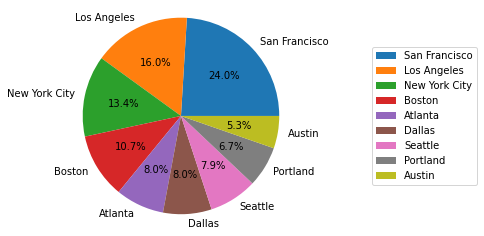

In [245]:
# Перед тим, як перейдемо до дашборду в PowerBI побудуємо графіки (pie chart, bar chart, line chart, histogram, scatter plot
# whisker plot у python за допомогою matplotlib

# Підготуємо агрегований датафрейм pie_chart_sales

pie_chart_sales=sales_2019.groupby("City",as_index=False).agg({
    'Order ID':lambda orders:orders.nunique()
}).rename(columns={
    'Order ID':'Unique Orders'
}).sort_values(by=['Unique Orders'],ascending=False)

# Дані для діаграми

labels_chart=pie_chart_sales['City']
values_chart=pie_chart_sales['Unique Orders']

# Створення кругової діаграми
plt.pie(values_chart, labels=labels_chart, autopct='%1.1f%%')
plt.axis('equal')

# Поставимо legend і перемістимо її щоб вона не закривала pie cart 
plt.legend(bbox_to_anchor=(1.4, 0.5), loc='center right')

# Відображаємо діаграму
plt.show()




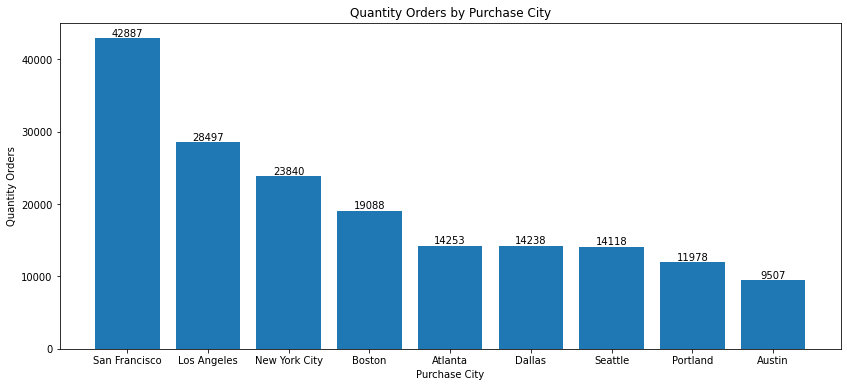

In [246]:
# побудуємо bar chart на основі міста купівлі

# Створення bar chart
fig = plt.figure(figsize=(14, 6))
plt.bar(labels_chart, values_chart)

# Додаємо мітки над стовпчиками
for nm, data_label in enumerate(values_chart):
    plt.text(nm, data_label, str(data_label), ha='center', va='bottom')

# Налаштування осей X та Y 
plt.xlabel('Purchase City')
plt.ylabel('Quantity Orders')
plt.title('Quantity Orders by Purchase City')

# Відображення графіку
plt.show()

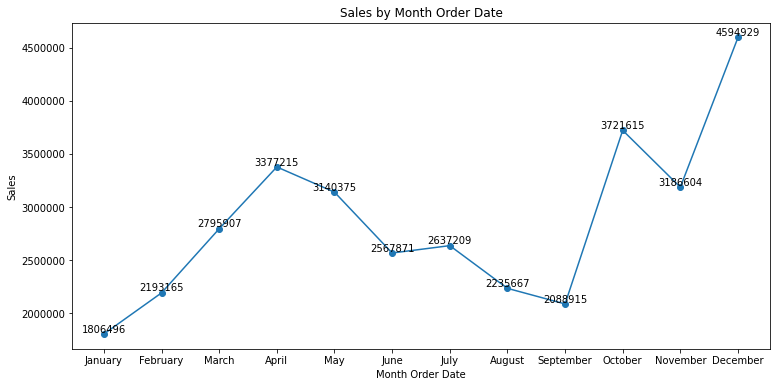

In [296]:
# побудуємо line chart 

# підготуємо датафрейм

line_chart_sales=sales_2019[['Quantity Ordered','Price Each','Order Date']]
line_chart_sales['Each Sales']=(line_chart_sales['Price Each']*line_chart_sales['Quantity Ordered']).astype("int")
line_chart_sales['Month Order Date']=line_chart_sales['Order Date'].dt.month
line_chart_sales=line_chart_sales.groupby("Month Order Date",as_index=False).agg({
    'Each Sales':'sum'
}).rename(columns={
    'Each Sales':'Total Sales'
}).sort_values(by=['Month Order Date'])

# Створення line chart + додаємо маркер значень
fig = plt.figure(figsize=(12.5, 6))
plt.plot(line_chart_sales['Month Order Date'], line_chart_sales['Total Sales'],marker='o')

plt.xticks(line_chart_sales['Month Order Date'], list(calendar.month_name[1:]))

# Додаємо мітки над стовпчиками
for i, j in zip(line_chart_sales['Month Order Date'], line_chart_sales['Total Sales']):
    plt.text(i, j, str(j), ha='center', va='bottom')

# Налаштування осей X та Y 
plt.xlabel('Month Order Date')
plt.ylabel('Sales')
plt.title('Sales by Month Order Date')

# Прибираємо формат le6 для осі Y.
plt.ticklabel_format(style='plain', axis='y')

# Відображення графіку
plt.show()

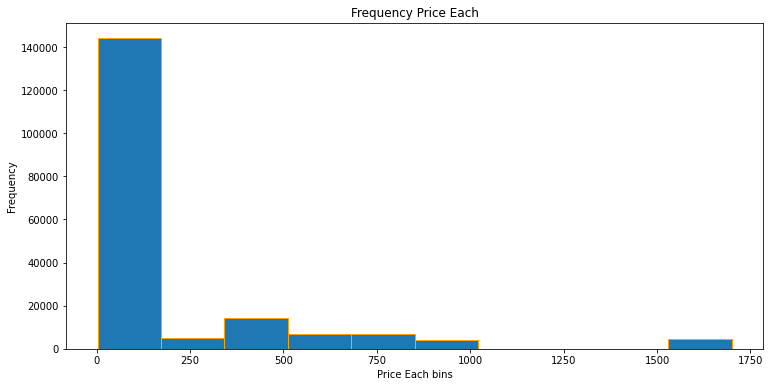

Аналог value counts має вигляд


(1.292, 172.691]        144118
(172.691, 342.392]        4799
(342.392, 512.093]       14474
(512.093, 681.794]        6836
(681.794, 851.495]        6840
(851.495, 1021.196]       4126
(1021.196, 1190.897]         0
(1190.897, 1360.598]         0
(1360.598, 1530.299]         0
(1530.299, 1700.0]        4723
Name: Price Each, dtype: int64

In [426]:
# створемо гістограму hist chart. Аналогом для pandas є value_counts з доп.умовою bins=N 

fig = plt.figure(figsize=(12.5, 6))
plt.hist(sales_2019['Price Each'],bins=10,edgecolor='orange') 

# Налаштування осей X та Y 
plt.xlabel('Price Each bins')
plt.ylabel('Frequency')
plt.title('Frequency Price Each')
# Відображення графіку
plt.show()

print('Аналог value counts має вигляд')
sales_2019['Price Each'].value_counts(bins=10).sort_index()

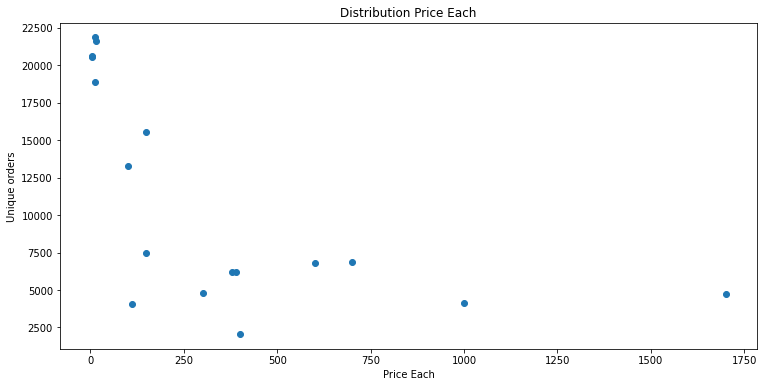

In [360]:
# створемо scatter plot 

# підготуємо датафрейм

scatter_plot_sales=sales_2019.groupby("Price Each",as_index=False).agg({
    'Order ID':lambda x:x.nunique()
}).rename(columns={
    'Order ID':'Unique orders'
}).sort_values(by=['Unique orders'],ascending=False)

fig = plt.figure(figsize=(12.5, 6))
plt.scatter(scatter_plot_sales['Price Each'],scatter_plot_sales['Unique orders'])

# Налаштування осей X та Y 
plt.xlabel('Price Each')
plt.ylabel('Unique orders')
plt.title('Distribution Price Each')

# Відображення графіку
plt.show()







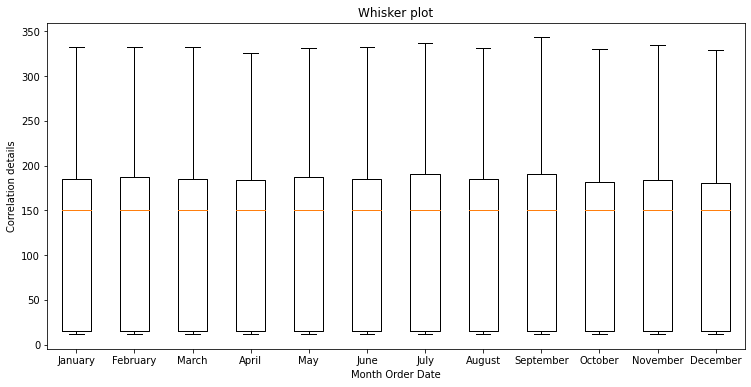

             count        mean         std   min    25%    50%    75%      max
Month                                                                         
April      18279.0  185.495390  331.985219  2.99  11.95  14.95  150.0  3400.00
August     11961.0  187.648849  332.290186  2.99  11.95  14.95  150.0  1700.00
December   24984.0  184.655913  332.689020  2.99  11.95  14.95  150.0  1700.00
February   11975.0  183.884962  325.836501  2.99  11.95  14.95  150.0  1700.00
January     9675.0  187.450795  330.814843  2.99  11.95  14.95  150.0  1999.98
July       14293.0  185.249826  332.873967  2.99  11.95  14.95  150.0  1700.00
June       13554.0  190.187565  337.420812  2.99  11.95  14.95  150.0  3400.00
March      15153.0  185.250471  331.331329  2.99  11.95  14.95  150.0  1700.00
May        16566.0  190.305852  343.054180  2.99  11.95  14.95  150.0  3400.00
November   17573.0  182.074956  330.108334  2.99  11.95  14.95  150.0  1700.00
October    20282.0  184.238580  334.148820  2.99  11

In [449]:
# створемо whisker plot. Cкладнощі використання цього типу графіка для датасету sales тим що 25,50,75% percentile однаковий
# не дивлячись на те, беремо ми усі доступні Products або якийсь конкретний. Єдине що відрізняється - це кількість товарів
# mean - cереднє значення , std - стандартне відхилення та максимум. 


whisker_plot_sales=sales_2019[['Order Date','City','Quantity Ordered','Price Each']]
whisker_plot_sales['Month']=whisker_plot_sales['Order Date'].dt.month_name()
whisker_plot_sales['Each Sales']=whisker_plot_sales['Price Each']*whisker_plot_sales['Quantity Ordered']
grouped_data=whisker_plot_sales.groupby(
    whisker_plot_sales['Month'])['Each Sales'].describe()
plot_data = pd.DataFrame([
    grouped_data['25%'].values, 
    grouped_data['50%'].values, 
    grouped_data['75%'].values,
    grouped_data['mean'].values,
    grouped_data['std'].values,
])

# нумерацію переставимо на +1, щоб потім використати list(calendar.month_name[1:])
plot_data.columns=plot_data.columns+1
fig = plt.figure(figsize=(12.5, 6))
plt.boxplot(plot_data)


# Налаштування осей X та Y 
plt.xlabel('Month Order Date')
plt.ylabel('Correlation details')
plt.title('Whisker plot')
plt.xticks(plot_data.columns,list(calendar.month_name[1:]))
plt.show()

print(grouped_data)
